## IPL Data Analysis Hackathon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
# df1 indicates the dataframe of all matches

df1 = pd.read_csv(r"C:\Users\bbhav\Downloads\matches.csv")
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 756    │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 18     │ │ int32       │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %    ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id                   │    0 │       0 │     1800 │   3500 │      1 │    190 │    570 │    11000 │  █   ▁▁  │  │
│ │ season               │    0 │       0 │     2000 │    3.4 │   2000 │   2000 │   2000 │     2000 │  ▆▇█▆▆▆  │  │
│ │ dl_applied           │    0 │       0 │    0.025 │   0.16 │      0 │      0 │      0 │        1 │    █     │  │
│ │ win_by_runs          │    0 │       0 │       13 │     23 │      0 │      0 │     19 │      150 │    █▁    │  │
│ │ win_by_wickets       │    0 │       0 │      3.4 │    3.4 │      0 │      0 │      6 │       10 │  █▁▁▄▃▁  │  │
│ └──────────────────────┴──────┴─────────┴──────────┴────────┴────────┴────────┴────────┴──────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA       ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ city                           │        7 │      0.93 │                          1 │                   770 │  │
│ │ date                           │        0 │         0 │                          1 │                   770 │  │
│ │ team1                          │        0 │         0 │                          1 │                   770 │  │
│ │ team2                          │        0 │         0 │                          1 │                   770 │  │
│ │ toss_winner                    │        0 │         0 │                          1 │                   770 │  │
│ │ toss_decision                  │        0 │         0 │                          1 │                   770 │  │
│ │ result                         │        0 │         0 │                          1 │                   770 │  │
│ │ winner                         │        4 │      0.53 │                          1 │                   770 │  │
│ │ player_of_match                │        4 │      0.53 │                          1 │                   770 │  │
│ │ venue                          │        0 │         0 │                          1 │                   770 │  │
│ │ umpire1                        │        2 │      0.26 │                          1 │                   770 │  │
│ │ umpire2                        │        2 │      0.26 │                          1 │                   770 │  │
│ │ umpire3                        │      640 │        8

In [4]:
# df2 indicates the dataframe of deliveries

df2 = pd.read_csv(r"C:\Users\bbhav\Downloads\deliveries.csv")
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
skim(df2)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 179078 │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 21     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %    ┃ mean        ┃ sd       ┃ p0   ┃ p25   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ match_id             │    0 │       0 │        1800 │     3500 │    1 │   190 │   570 │   11000 │  █   ▁▁  │  │
│ │ inning               │    0 │       0 │         1.5 │      0.5 │    1 │     1 │     2 │       5 │    █▇    │  │
│ │ over                 │    0 │       0 │          10 │      5.7 │    1 │     5 │    15 │      20 │  █▆▆▆▆▇  │  │
│ │ ball                 │    0 │       0 │         3.6 │      1.8 │    1 │     2 │     5 │       9 │  █▄▄█▁   │  │
│ │ is_super_over        │    0 │       0 │     0.00045 │    0.021 │    0 │     0 │     0 │       1 │    █     │  │
│ │ wide_runs            │    0 │       0 │       0.037 │     0.25 │    0 │     0 │     0 │       5 │    █     │  │
│ │ bye_runs             │    0 │       0 │      0.0049 │     0.12 │    0 │     0 │     0 │       4 │    █     │  │
│ │ legbye_runs          │    0 │       0 │       0.021 │     0.19 │    0 │     0 │     0 │       5 │    █     │  │
│ │ noball_runs          │    0 │       0 │      0.0042 │     0.07 │    0 │     0 │     0 │       5 │    █     │  │
│ │ penalty_runs         │    0 │       0 │     5.6e-05 │    0.017 │    0 │     0 │     0 │       5 │    █     │  │
│ │ batsman_runs         │    0 │       0 │         1.2 │      1.6 │    0 │     0 │     1 │       7 │   █▁ ▁   │  │
│ │ extra_runs           │    0 │       0 │       0.067 │     0.34 │    0 │     0 │     0 │       7 │    █     │  │
│ │ total_runs           │    0 │       0 │         1.3 │      1.6 │    0 │     0 │     1 │      10 │   █▁▁    │  │
│ └──────────────────────┴──────┴─────────┴─────────────┴──────────┴──────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA           ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ batting_team                   │            0 │         0 │                      2.5 │              450000 │  │
│ │ bowling_team                   │            0 │         0 │                      2.5 │              450000 │  │
│ │ batsman                        │            0 │         0 │                      2.5 │              450000 │  │
│ │ non_striker                    │            0 │         0 │                      2.5 │              450000 │  │
│ │ bowler                         │            0 │     

###  Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [6]:
ipl_df = pd.merge(df2, df1 , left_on='match_id', right_on='id', how='outer')
ipl_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
ipl_df.to_csv('ipl_df.csv', index=False)

In [8]:
import os
os.getcwd()

'C:\\Users\\bbhav'

In [9]:
ipl_df = pd.read_csv(r"C:\Users\bbhav\ipl_df.csv")

In [10]:
skim(ipl_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 179078 │ │ string      │ 21    │                                                          │
│ │ Number of columns │ 39     │ │ int32       │ 18    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean       ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ match_id             │    0 │      0 │       1800 │    3500 │      1 │    190 │    570 │   11000 │ █   ▁▁  │  │
│ │ inning               │    0 │      0 │        1.5 │     0.5 │      1 │      1 │      2 │       5 │   █▇    │  │
│ │ over                 │    0 │      0 │         10 │     5.7 │      1 │      5 │     15 │      20 │ █▆▆▆▆▇  │  │
│ │ ball                 │    0 │      0 │        3.6 │     1.8 │      1 │      2 │      5 │       9 │  █▄▄█▁  │  │
│ │ is_super_over        │    0 │      0 │    0.00045 │   0.021 │      0 │      0 │      0 │       1 │    █    │  │
│ │ wide_runs            │    0 │      0 │      0.037 │    0.25 │      0 │      0 │      0 │       5 │    █    │  │
│ │ bye_runs             │    0 │      0 │     0.0049 │    0.12 │      0 │      0 │      0 │       4 │    █    │  │
│ │ legbye_runs          │    0 │      0 │      0.021 │    0.19 │      0 │      0 │      0 │       5 │    █    │  │
│ │ noball_runs          │    0 │      0 │     0.0042 │    0.07 │      0 │      0 │      0 │       5 │    █    │  │
│ │ penalty_runs         │    0 │      0 │    5.6e-05 │   0.017 │      0 │      0 │      0 │       5 │    █    │  │
│ │ batsman_runs         │    0 │      0 │        1.2 │     1.6 │      0 │      0 │      1 │       7 │  █▁ ▁   │  │
│ │ extra_runs           │    0 │      0 │      0.067 │    0.34 │      0 │      0 │      0 │       7 │    █    │  │
│ │ total_runs           │    0 │      0 │        1.3 │     1.6 │      0 │      0 │      1 │      10 │   █▁▁   │  │
│ │ id                   │    0 │      0 │       1800 │    3500 │      1 │    190 │    570 │   11000 │ █   ▁▁  │  │
│ │ season               │    0 │      0 │       2000 │     3.4 │   2000 │   2000 │   2000 │    2000 │ ▆▇█▆▆▆  │  │
│ │ dl_applied           │    0 │      0 │      0.018 │    0.13 │      0 │      0 │      0 │       1 │    █    │  │
│ │ win_by_runs          │    0 │      0 │         13 │      23 │      0 │      0 │     19 │     150 │   █▁    │  │
│ │ win_by_wickets       │    0 │      0 │        3.3 │     3.3 │      0 │      0 │      6 │      10 │ █▁▁▄▃▁  │  │
│ └──────────────────────┴──────┴────────┴────────────┴─────────┴────────┴────────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA           ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━

### The column which has the most missing values according to the data is:

In [11]:
missing_values=ipl_df.isnull().sum().idxmax()

print(f"The column with the most missing values is : {missing_values}")

The column with the most missing values is : fielder


### City which hosted most number of seasons according to the data is:

In [12]:
# find the city with max number of seasons 

host= ipl_df['city'].value_counts().idxmax()
print(f'The city that hosted most number of seasons is : {host}')

The city that hosted most number of seasons is : Mumbai


### Which year has the most number of matches played?

In [13]:
year = ipl_df['season'].value_counts().idxmax()
print(f"The year with the most number of matches played is: {year}")

The year with the most number of matches played is: 2013


###  Maximum wins by Mumbai Indians in 2011 are?

In [14]:
mumbai = df1[(df1['season'] == 2011) & ((df1['team1'] == 'Mumbai Indians') | (df1['team2'] == 'Mumbai Indians'))]

wins = mumbai[mumbai['winner'] == 'Mumbai Indians']['winner'].count()

print(f"Maximum wins by Mumbai Indians in 2011 are : {wins}")

Maximum wins by Mumbai Indians in 2011 are : 10


### For 'toss_decision' feature what kind of plot is suitable?


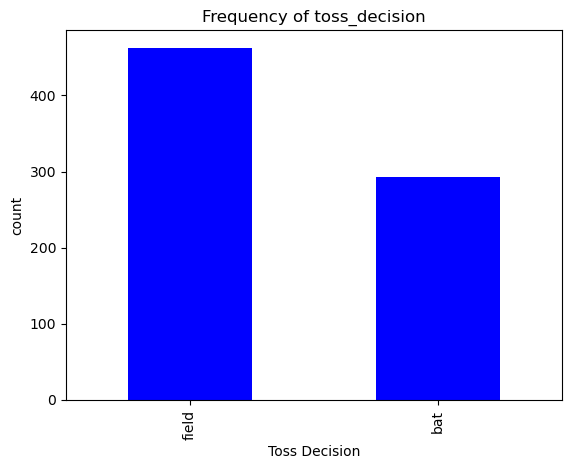

In [15]:
df1['toss_decision'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Frequency of toss_decision')
plt.xlabel('Toss Decision')
plt.ylabel('count')
plt.show()

> Bar plot is best suitable to predict toss decision. And, from the above plot we can observe that the highly occurred feature while tossing is fielding

### What is the percentage of getting bat and field in feature 'toss_descision'?

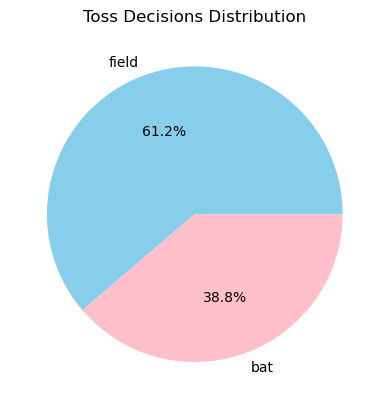

In [16]:
plt.pie(df1['toss_decision'].value_counts(), labels=df1['toss_decision'].value_counts().index, autopct='%1.1f%%',
        colors=['skyblue', 'pink'])
plt.title('Toss Decisions Distribution')
plt.show()

>the percentage of getting bat and field in feature 'toss_descision' is 38.8% and 61.2%

### Analysing the team toss and match winning 

In [17]:
# Teams which choose fielding

fwin = df1[(df1['toss_decision']=='field')&(df1['toss_winner']==df1['winner'])]['winner'].count()
fwin

259

In [18]:
# Teams which choose batting

bwin = df1[(df1['toss_decision']=='bat')&(df1['toss_winner']==df1['winner'])]['winner'].count()
bwin

134

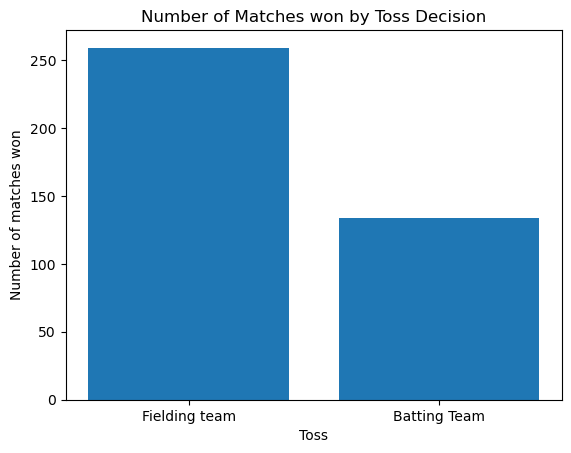

In [19]:
plt.bar(['Fielding team','Batting Team'],[fwin, bwin])
plt.title('Number of Matches won by Toss Decision')
plt.xlabel('Toss')
plt.ylabel('Number of matches won')
plt.show()

> Teams winning tosses and electing field first have won more number of matches.

###  In which years where taking batting second have won more number of matches?

In [20]:
batting_2nd = ipl_df[ipl_df['toss_decision'] == 'field']['season'].value_counts().sort_index()

years_with_more_wins = batting_2nd[batting_2nd == batting_2nd.max()].index.tolist()
years_with_more_wins

[2019]

### To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

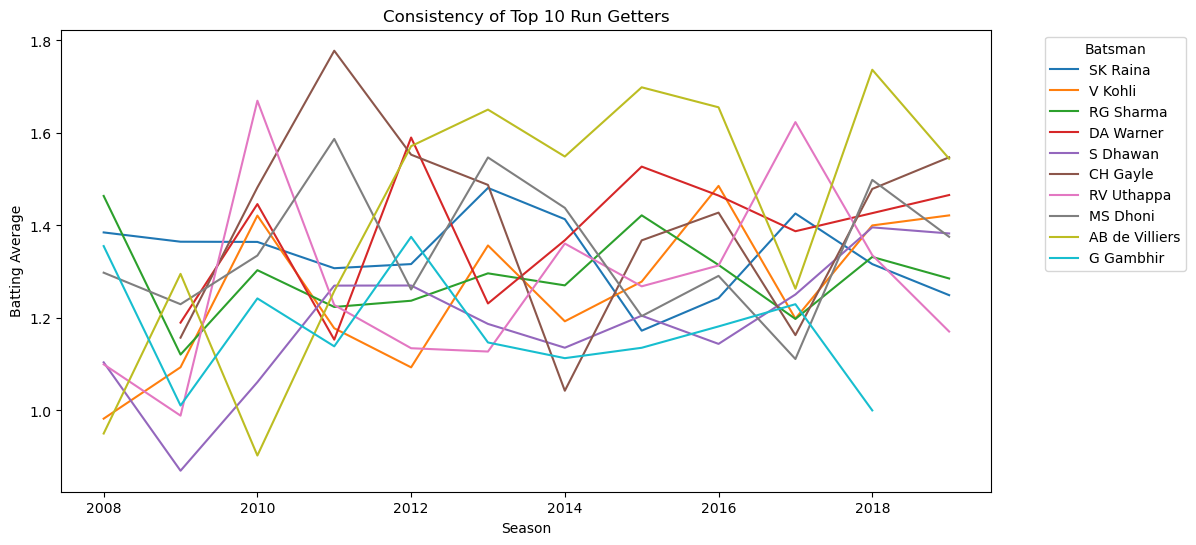

In [21]:
top_10 = ipl_df.groupby('batsman')['total_runs'].sum().nlargest(10).index

plt.figure(figsize=(12, 6))
for batsman in top_10:
    batsman_data = ipl_df[ipl_df['batsman'] == batsman]
    batting_average = batsman_data.groupby('season')['batsman_runs'].mean()
    plt.plot(batting_average, label=batsman)

plt.title('Consistency of Top 10 Run Getters')
plt.xlabel('Season')
plt.ylabel('Batting Average')
plt.legend(title='Batsman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###  In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [22]:
ipl_2019 = ipl_df[(ipl_df['season'] == 2019) & (ipl_df['batsman_runs'].isin([4, 6]))]

runs_by_fs = ipl_2019.groupby('batsman')['batsman_runs'].sum().nlargest(1)
runs_by_fs


batsman
AD Russell    438
Name: batsman_runs, dtype: int64

###  Most number of wickets taken by a bowler is?

In [23]:
bowler = ipl_df['bowler'].value_counts().idxmax()
max_wickets = ipl_df['bowler'].value_counts().max()

print(f'The bowler who took most number of wickets is {bowler} with {max_wickets} wickets' )

The bowler who took most number of wickets is Harbhajan Singh with 3451 wickets


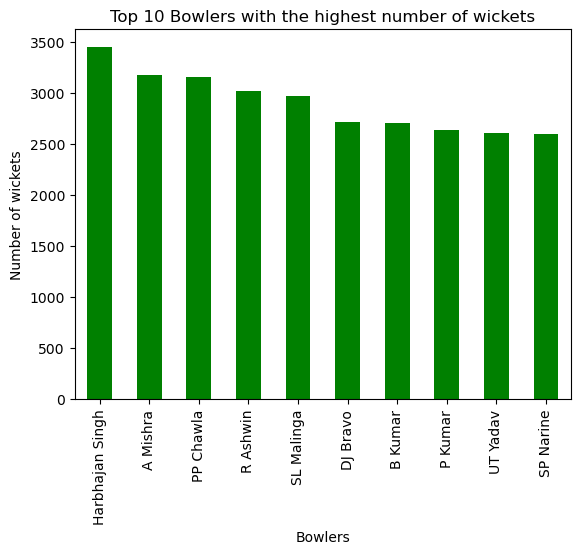

In [24]:
bowlers = ipl_df['bowler'].value_counts().head(10)

bowlers.sort_values(ascending = False).plot(kind ='bar',color = 'green')
plt.title('Top 10 Bowlers with the highest number of wickets')
plt.xlabel('Bowlers')
plt.ylabel('Number of wickets')
plt.show()

### What is the strike rate of Kohli in 2016?

In [25]:
ipl_2016 = ipl_df[(ipl_df['batsman'] == 'V Kohli') & (ipl_df['season'] == 2016)]

total_runs = ipl_2016['total_runs'].sum()
total_balls = ipl_2016['ball'].sum()

strike_rate = (total_runs/total_balls)*100

print(f"Kohli's strike rate in 2016 was : {strike_rate} ")

Kohli's strike rate in 2016 was : 44.4543429844098 


###  Bowlers with maximum number of extras

In [26]:
bowler_extras = ipl_df.groupby('bowler')['extra_runs'].sum()
max_extras_bowler = bowler_extras.idxmax()

print(f"Bowlers with the maximum number of extras : {max_extras_bowler}")

Bowlers with the maximum number of extras : SL Malinga


### Which venue has hosted most number of IPL matches?


In [27]:
venue = ipl_df['venue'].value_counts()

venue_name = venue.idxmax()
no_of_matches = venue.max()

print(f"The venue which has hosted most number of IPL matches is {venue_name} with {no_of_matches} matches.")

The venue which has hosted most number of IPL matches is Eden Gardens with 17991 matches.


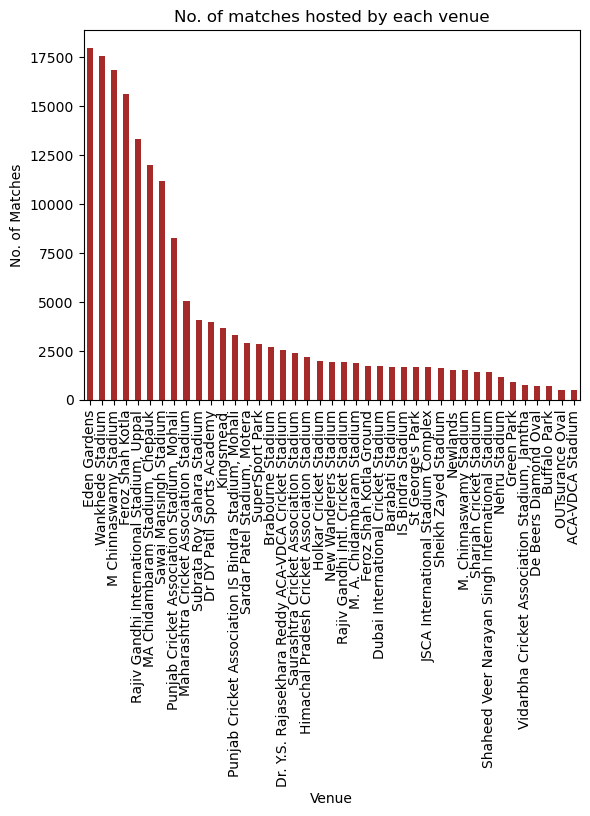

In [28]:
venue.plot(kind = 'bar', color='brown')
plt.title('No. of matches hosted by each venue')
plt.xlabel('Venue')
plt.ylabel('No. of Matches')
plt.show()

### In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [29]:
match_2017 = ipl_df[(ipl_df['season'] == 2017) & (ipl_df['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & (ipl_df['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore']))]


player_of_match = match_2017.loc[match_2017['player_of_match'].notnull(), 'player_of_match'].values[0]

print(f"In the match between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017, the player of the match was {player_of_match}")

In the match between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017, the player of the match was Yuvraj Singh


### Across seasons who are the top three batsman's with most number of run out?

In [30]:
run_outs = ipl_df[ipl_df['dismissal_kind'] == 'run out']
run_out_counts = run_outs.groupby('batsman')['dismissal_kind'].count()

# Get the top three batsmen with the most run-outs
top_three_run_outs = run_out_counts.nlargest(3)
top_three_run_outs

batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: dismissal_kind, dtype: int64

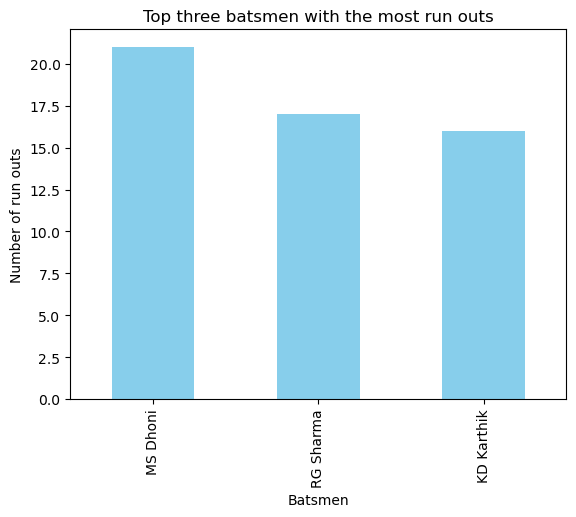

In [31]:
top_three_run_outs.sort_values(ascending=False).plot(kind='bar',color='skyblue')
plt.title('Top three batsmen with the most run outs')
plt.xlabel('Batsmen')
plt.ylabel('Number of run outs')
plt.show()

### What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [32]:
kohli_burmah = ipl_df[(ipl_df['batsman'] == 'V Kohli') & (ipl_df['bowler'] == 'JJ Bumrah')]

total_runs = kohli_burmah['batsman_runs'].sum()

print(f"Total runs scored by V Kohli when facing JJ Burmah was : {total_runs}")

Total runs scored by V Kohli when facing JJ Burmah was : 112


###  Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [33]:
caught_and_bowled = ipl_df[ipl_df['dismissal_kind'] == 'caught and bowled']

dismissed_count = caught_and_bowled['batsman'].value_counts()

max_dismissed_player = dismissed_count.idxmax()
max_dismissed_count = dismissed_count.max()

print(f"The player dismissed the maximum number of times via caught and bowled is {max_dismissed_player} with {max_dismissed_count} dismissals. ")

The player dismissed the maximum number of times via caught and bowled is SK Raina with 7 dismissals. 


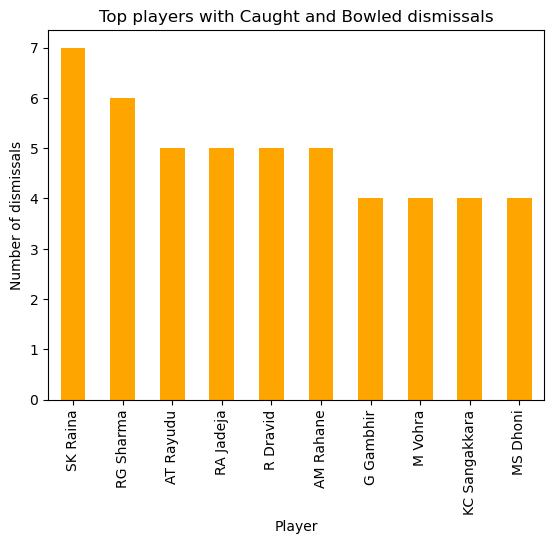

In [34]:
dismissed_count.head(10).sort_values(ascending =False).plot(kind='bar', color='orange')
plt.title('Top players with Caught and Bowled dismissals')
plt.xlabel('Player')
plt.ylabel('Number of dismissals')
plt.show()

### which player has the highest hard-hitting ability?


In [35]:
sixes_df = ipl_df[ipl_df['batsman_runs'] == 6]
sixes_count = sixes_df.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
highest_sixes_player = sixes_count.idxmax()

print(f"The highest hard hitting player is : {highest_sixes_player}")

The highest hard hitting player is : CH Gayle
